In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

## Read Data

In [32]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.groupby("Species").size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [34]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
cols = df.columns
print(cols)
x = df[cols[:-1]].values
y = df[cols[-1]].values
print(x[5], y[5])
print(x.shape, y.shape)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
[5.4 3.9 1.7 0.4] setosa
(150, 4) (150,)


## Encoder

In [36]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train Test Split

In [37]:
X_train, X_test, Y_train,  Y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

## Data Visualization

<Axes: xlabel='count', ylabel='Species'>

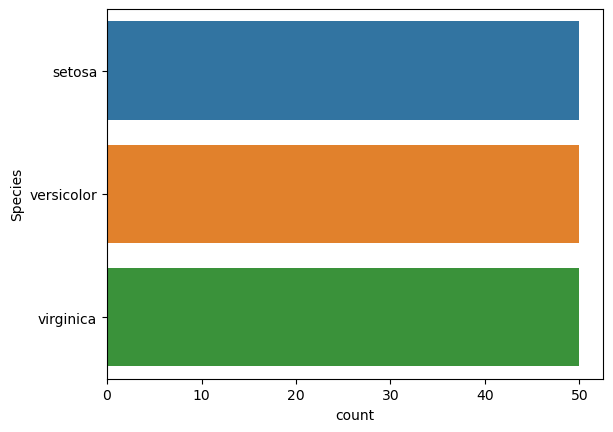

In [38]:
sns.countplot(y="Species", data=df)

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

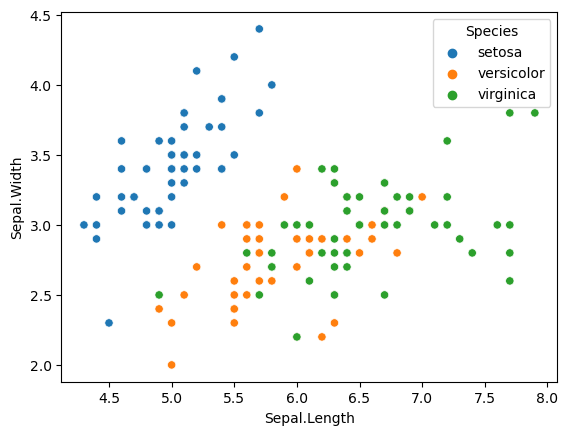

In [39]:
sns.scatterplot(x='Sepal.Length',y='Sepal.Width',hue='Species',data=df)

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

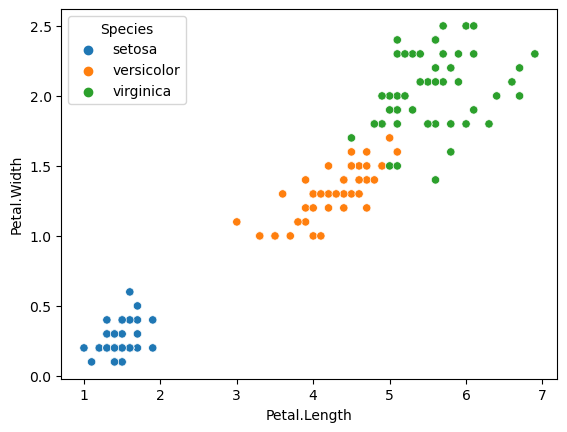

In [40]:
sns.scatterplot(x="Petal.Length",y="Petal.Width",hue='Species', data=df )

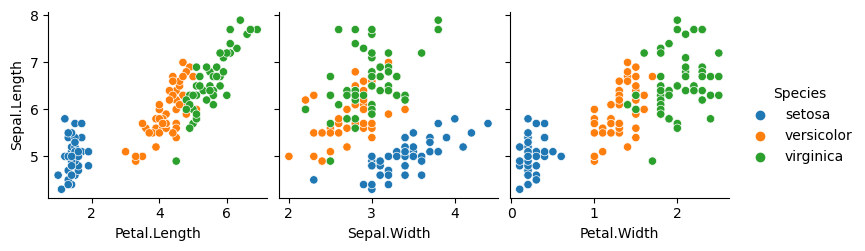

In [41]:
sns.pairplot(data=df, hue="Species", y_vars=["Sepal.Length", ], x_vars=["Petal.Length", "Sepal.Width", "Petal.Width"])

## KNN model

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## Prediction and Accuracy

In [43]:
prediction = knn.predict(X_test)
prediction

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [44]:
accuracy = accuracy_score(Y_test, prediction)
print(f"Model accuracy : {round(accuracy * 100, 2)}")

Model accuracy : 96.67


## Anomalies

In [45]:
cols = df.Species.unique()
print(cols)
for i, (a,b) in enumerate(zip(prediction, Y_test)):
    if a != b:
        print(f"Actual : {cols[a]}, Prediciton: {cols[b]} at index = {i}")

['setosa' 'versicolor' 'virginica']
Actual : virginica, Prediciton: versicolor at index = 14
